# Importing Libraries

In [2]:
import math
import numpy as np

from skimage.io import imread, imshow, imsave
from skimage.color import rgba2rgb, rgb2gray
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure, img_as_ubyte
import matplotlib.pyplot as plt

# Reading the image

(231, 123, 4)


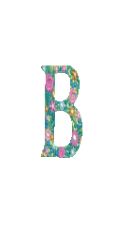

In [3]:
img = imread('B1bg.png')
plt.axis("off")
plt.imshow(img)
print(img.shape)

# Resizing image

(128, 64, 4)


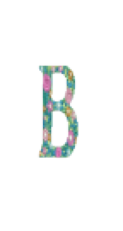

In [10]:
resized_img = resize(img, (128, 64))
plt.axis("off")
plt.imshow(resized_img)
print(resized_img.shape)

# Creating and visualizing HOG Features

C:\Users\Titan\AppData\Local\Temp\ipykernel_6188\360877264.py:1: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),


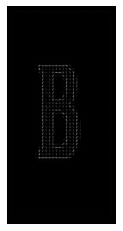

In [5]:
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")
plt.show()

In [13]:
def hog(img):
    # bins = 9, block size (size of cell) = 8x8
    nbins = 9
    block_size = 4
    # Initialize magnitudes and angles matrix
    m_img = img.copy()
    angles = np.zeros(img.shape)
    step = 180 / nbins  # width of bin
    # Initialize histogram matrix.
    hist = np.zeros((img.shape[0] // block_size, img.shape[1] // block_size, nbins))
    for row in range(0, img.shape[0] - 1):
        for col in range(0, img.shape[1] - 1):
            # Compute gradients, for border pixels just ignore the other parameter in the gradient equation.
            if col == 0:
                gx = img[row, col + 1]
            elif col + 1 == img.shape[1]:
                gx = - img[row, col - 1]
            else:
                gx = img[row, col + 1] - img[row, col - 1]
            if row == 0:
                gy = - img[row + 1, col]
            elif row + 1 == img.shape[0]:
                gy = img[row - 1, col]
            else:
                gy = img[row - 1, col] - img[row + 1, col]
            m_img[row, col] = math.sqrt(gx ** 2 + gy ** 2)
            angles[row, col] = (math.atan2(gy, gx) % math.pi) * 180 / math.pi
    hist_row = 0

    # For each 8x8 block, calculate the value of the histogram based
    # on how much each angle deviates from the center of the bin.
    for row_index in range(0, img.shape[0], block_size):
        hist_col = 0
        for col_index in range(0, img.shape[1], block_size):
            for window_row_index in range(block_size):
                for window_col_index in range(block_size):
                    angle = angles[window_row_index, window_col_index]
                    magnitude = m_img[row_index + window_row_index, col_index + window_col_index]
                    hist_vector_index = int(angle / step - 0.5) % nbins
                    cj1 = step * (hist_vector_index + 1 + 0.5)  # Next bin's center.
                    cj = step * (hist_vector_index + 0.5)  # Current bin's center
                    # How much current angle deviates from next bin's center.
                    distance_from_angle_percentage = (cj1 - angle) / step
                    hist[hist_row, hist_col, hist_vector_index] += distance_from_angle_percentage * magnitude
                    # How much current angle deviates from the current bin's center.
                    distance_from_angle_percentage = (angle - cj) / step
                    hist[hist_row, hist_col, (hist_vector_index + 1) % 9] += distance_from_angle_percentage * magnitude
            hist_col += 1
        hist_row += 1

    final_hist = []
    # For each 16x16 block, concatenate the histogram of the underlying 2x2 cell of 8x8 blocks.
    for row_index in range(0, hist.shape[0] - 1):
        for col_index in range(0, hist.shape[1] - 1):
            new_vector = np.array([list(hist[row_index, col_index]) + list(hist[row_index, col_index + 1]) +
                                   list(hist[row_index + 1, col_index]) + list(hist[row_index + 1, col_index + 1])])
            # Normalize the vector using L2 normalization, the vector's values are divided by the vector's magnitude
            new_vector_list = np.round((new_vector / math.sqrt(np.sum(new_vector ** 2) + 10 ** -5)), 10).tolist()[0]
            final_hist += new_vector_list
    return final_hist


hog_img = (imread('grayB.jpg'))
feature_vectors = hog(rgb2gray(rgba2rgb(resized_img)))
print(f'Number of HOG features = {len(feature_vectors)}')
# print(feature_vectors)

Number of HOG features = 16740


In [ ]:
imsave('grayB.jpg', rgb2gray(rgba2rgb(resized_img)))

In [51]:
import skimage

fd, hog_image = skimage.feature.hog(img_as_ubyte(((imread('grayB.jpg')))), orientations=9, pixels_per_cell=(8, 8),
                                    cells_per_block=(1, 1), visualize=True, multichannel=False, block_norm='L2')
print(len(fd), list(fd))

C:\Users\Titan\AppData\Local\Temp\ipykernel_33568\2739446509.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = skimage.feature.hog((((imread('grayB.jpg')))), orientations=9, pixels_per_cell=(8, 8),


18432 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9999999968, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9999999968, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9999999968, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9999999968, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9999999968, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9999999968, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9999999968, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9999999968, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9999999968, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9999999968, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9999999968, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9999999968, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.99999999

In [31]:
nparr = np.array(feature_vectors) - np.array(fd)

KeyboardInterrupt: 